In [3]:
import pandas as pd
dataset=pd.read_csv("tweets.csv",encoding="ISO-8859-1")
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [4]:
def gen_freq(text):
    word_gen=[]
    for tw_words in text.split():
        word_gen.extend(tw_words)
    word_freq=pd.Series(word_gen).value_counts()
    word_freq[:20]
    return word_freq
gen_freq(dataset.text.str)
    

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
of                          4053
#Demonetization             3253
demonetization              3162
on                          2751
#demonetization             2474
PM                          2384
Modi                        2379
India                       2243
and                         2220
a                           2180
that                        2168
out                         1729
for                         1672
so                          1599
had                         1598
who                         1591
Narendra                    1564
by                          1488
rich                        1477
find                        1421
Dear                        1407
implement                   1399
actually                    1370
have                        1315
@evanspiegel                1306
          

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word frequencies
word_freq=gen_freq(dataset.text.str)

#generate wordcloud
wc=WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


# Pre_processing of data (text cleaning)

In [6]:
import re
def text_clean(text):
    text=re.sub(r'RT','',text)
    text=re.sub(r'&amp;','&',text)
    text=re.sub(r'[;,?!@.#-*]','',text)
    text=text.lower()
    return text

In [7]:
from wordcloud import STOPWORDS
print(STOPWORDS)

set(['all', "she'll", 'just', "don't", 'being', 'over', 'through', 'yourselves', 'its', 'before', 'how', "when's", "we've", 'had', 'should', "he'd", 'to', 'only', "there's", 'those', 'under', 'ours', 'has', "haven't", 'do', 'them', 'his', "they'll", 'get', 'very', "who's", "they'd", 'cannot', "you've", 'they', 'not', 'during', 'yourself', 'him', 'nor', "we'll", 'like', 'did', "they've", 'this', 'she', 'each', "won't", 'where', "mustn't", "isn't", "i'll", "why's", 'www', 'because', "you'd", 'doing', 'some', 'up', 'are', 'further', 'ourselves', 'out', 'what', 'for', 'since', 'while', "wasn't", 'does', "shouldn't", 'above', 'between', 'ever', 'ought', 'be', 'we', 'who', "you're", 'were', 'however', 'here', 'hers', "aren't", 'by', 'both', 'about', 'would', 'of', 'could', "he's", 'against', "i'd", "weren't", "i'm", 'com', 'or', "can't", 'otherwise', 'own', 'into', 'whom', 'down', "hadn't", "couldn't", "wouldn't", 'your', "doesn't", 'from', "how's", 'her', 'their', "it's", 'there', 'been', '

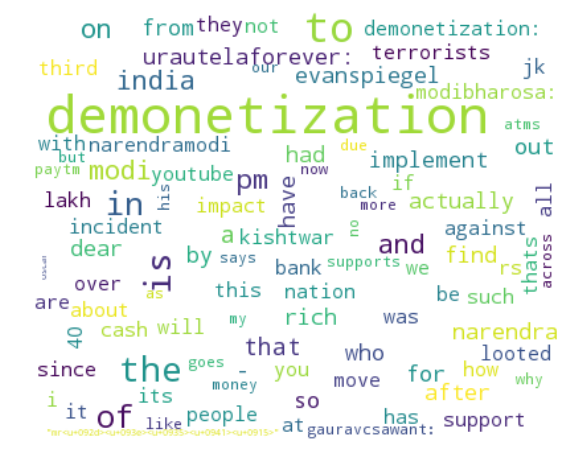

In [8]:
text=dataset.text.apply(lambda(x):text_clean(x))
word_freq=gen_freq(text.str)

word_freq.drop(labels=STOPWORDS, errors='ignore')

wc=WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
